# Communicate a data set

**project for Udacity Nanodegree by Léon de Jong**

Investigating the Prosper Loan dataset.

In [1]:
#import necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import rcParams
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
df_loan = pd.read_csv('prosperLoanData.csv')

In [3]:
#necessary transformations
#selection of variables for further analysis
voi = ['ListingKey','ListingCreationDate','Term','LoanStatus','BorrowerAPR','BorrowerRate','LenderYield','EstimatedEffectiveYield','EstimatedLoss','EstimatedReturn','ProsperRating (numeric)','ProsperRating (Alpha)','ProsperScore','ListingCategory (numeric)','CurrentlyInGroup','GroupKey','CreditScoreRangeLower','CreditScoreRangeUpper','AmountDelinquent','DebtToIncomeRatio','IncomeVerifiable','StatedMonthlyIncome','LoanKey','TotalProsperLoans','MonthlyLoanPayment']
# copied dataset with selection of variables for further wrangling and 
df_loan_filtered = df_loan[voi]
#convert listing creation date to datetime
df_loan_filtered['ListingCreationDate'] = df_loan_filtered['ListingCreationDate'].astype('datetime64')
df_loan_filtered = df_loan_filtered[df_loan_filtered['ListingCreationDate']>'2009-08-01']
# convert ProsperRating into ordered categorical types
ordinal_var_dict = {'ProsperRating (Alpha)': ['AA','A','B','C','D','E','HR']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df_loan_filtered[var] = df_loan_filtered[var].astype(ordered_var)

#create rating list to allow for reversal of order to compare to prosperscore
RatingList = ['AA','A','B','C','D','E','HR']

#creating a new category for AmountDelinquent
#conditions for new categories
conditions = [
    (df_loan_filtered['AmountDelinquent'] == 0),
    (df_loan_filtered['AmountDelinquent'] >0) & (df_loan_filtered['AmountDelinquent'] <=100),
    (df_loan_filtered['AmountDelinquent'] > 100),
    (df_loan_filtered['AmountDelinquent'].isnull())
]
#names for categories
values = ['None', 'Small','Large','Unknown' ]
#populate new column
df_loan_filtered['HasDelinquency'] = np.select(conditions,values)
# restructure as categorical value
df_loan_filtered['HasDelinquency'] = df_loan_filtered.HasDelinquency.astype('category')

#creating a new category for LoanStatus
#conditions for new categories
conditions = [
    (df_loan_filtered['LoanStatus'] == 'Current')|(df_loan_filtered['LoanStatus'] =='Completed') | (df_loan_filtered['LoanStatus'] == 'FinalPaymentInProgress'),
    (df_loan_filtered['LoanStatus'] == 'Defaulted') | (df_loan_filtered['LoanStatus'] == 'Chargedoff')|(df_loan_filtered['LoanStatus'].str.contains("Past Due"))
]
#names for categories
values = ['Nominal','Problematic' ]
#populate new column
df_loan_filtered['Loan_Result'] = np.select(conditions,values)
#restructure as categorical data
df_loan_filtered['Loan_Result'] = df_loan_filtered.Loan_Result.astype('category')

## Inital investigation of Dataset
As we are interested in the Yield of different listings, let's see how the listings in different yields compare. Also how do the ratings systems factor into this?

You will see the fairly regularly distributed amounts of listings in terms of the lenderyield. Pay close attention to the HR spike in the first plot.

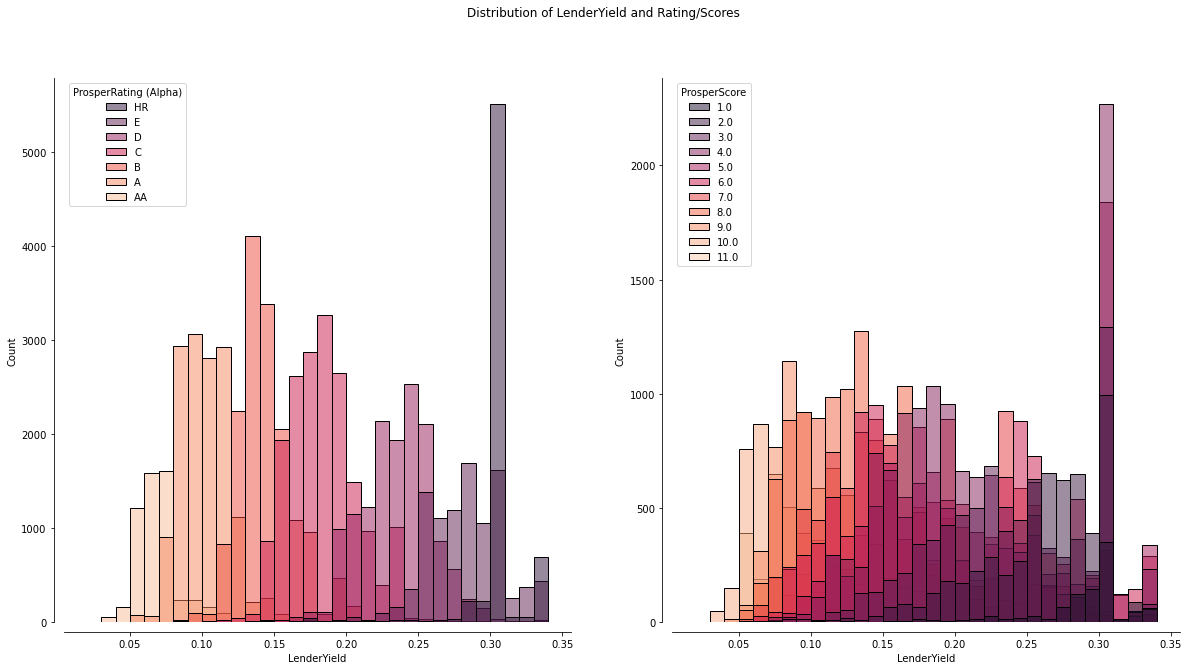

In [36]:
fig, axs= plt.subplots(ncols=2,figsize = (20,10))
fig.suptitle('Distribution of LenderYield and Rating/Scores')
binsize = 0.01
bins = np.arange(df_loan_filtered.LenderYield.min()-binsize, df_loan_filtered.LenderYield.max()+binsize, binsize )
#create rating list to allow for reversal of order to compare to prosperscore
Rating_list = ['AA','A','B','C','D','E','HR']
#Plot histograms of proser
sb.histplot(ax= axs[0], data = df_loan_filtered, x = 'LenderYield', bins = bins, hue= 'ProsperRating (Alpha)', hue_order = reversed(Rating_list), palette=sb.color_palette('rocket',n_colors = 7))
sb.despine(offset=10, trim=False)
sb.histplot(ax = axs[1],data = df_loan_filtered, x = 'LenderYield', bins = bins, hue= 'ProsperScore', palette=sb.color_palette('rocket',n_colors = 11))
sb.despine(offset=10, trim=False)

## Show relation between Scores, ratings and expected indicators

 Let's look at some further indicator values besides the rating system. How do the amounts delinquent, creditscore range, debt to income ratio and the estimated losses stack up to the rating systems?


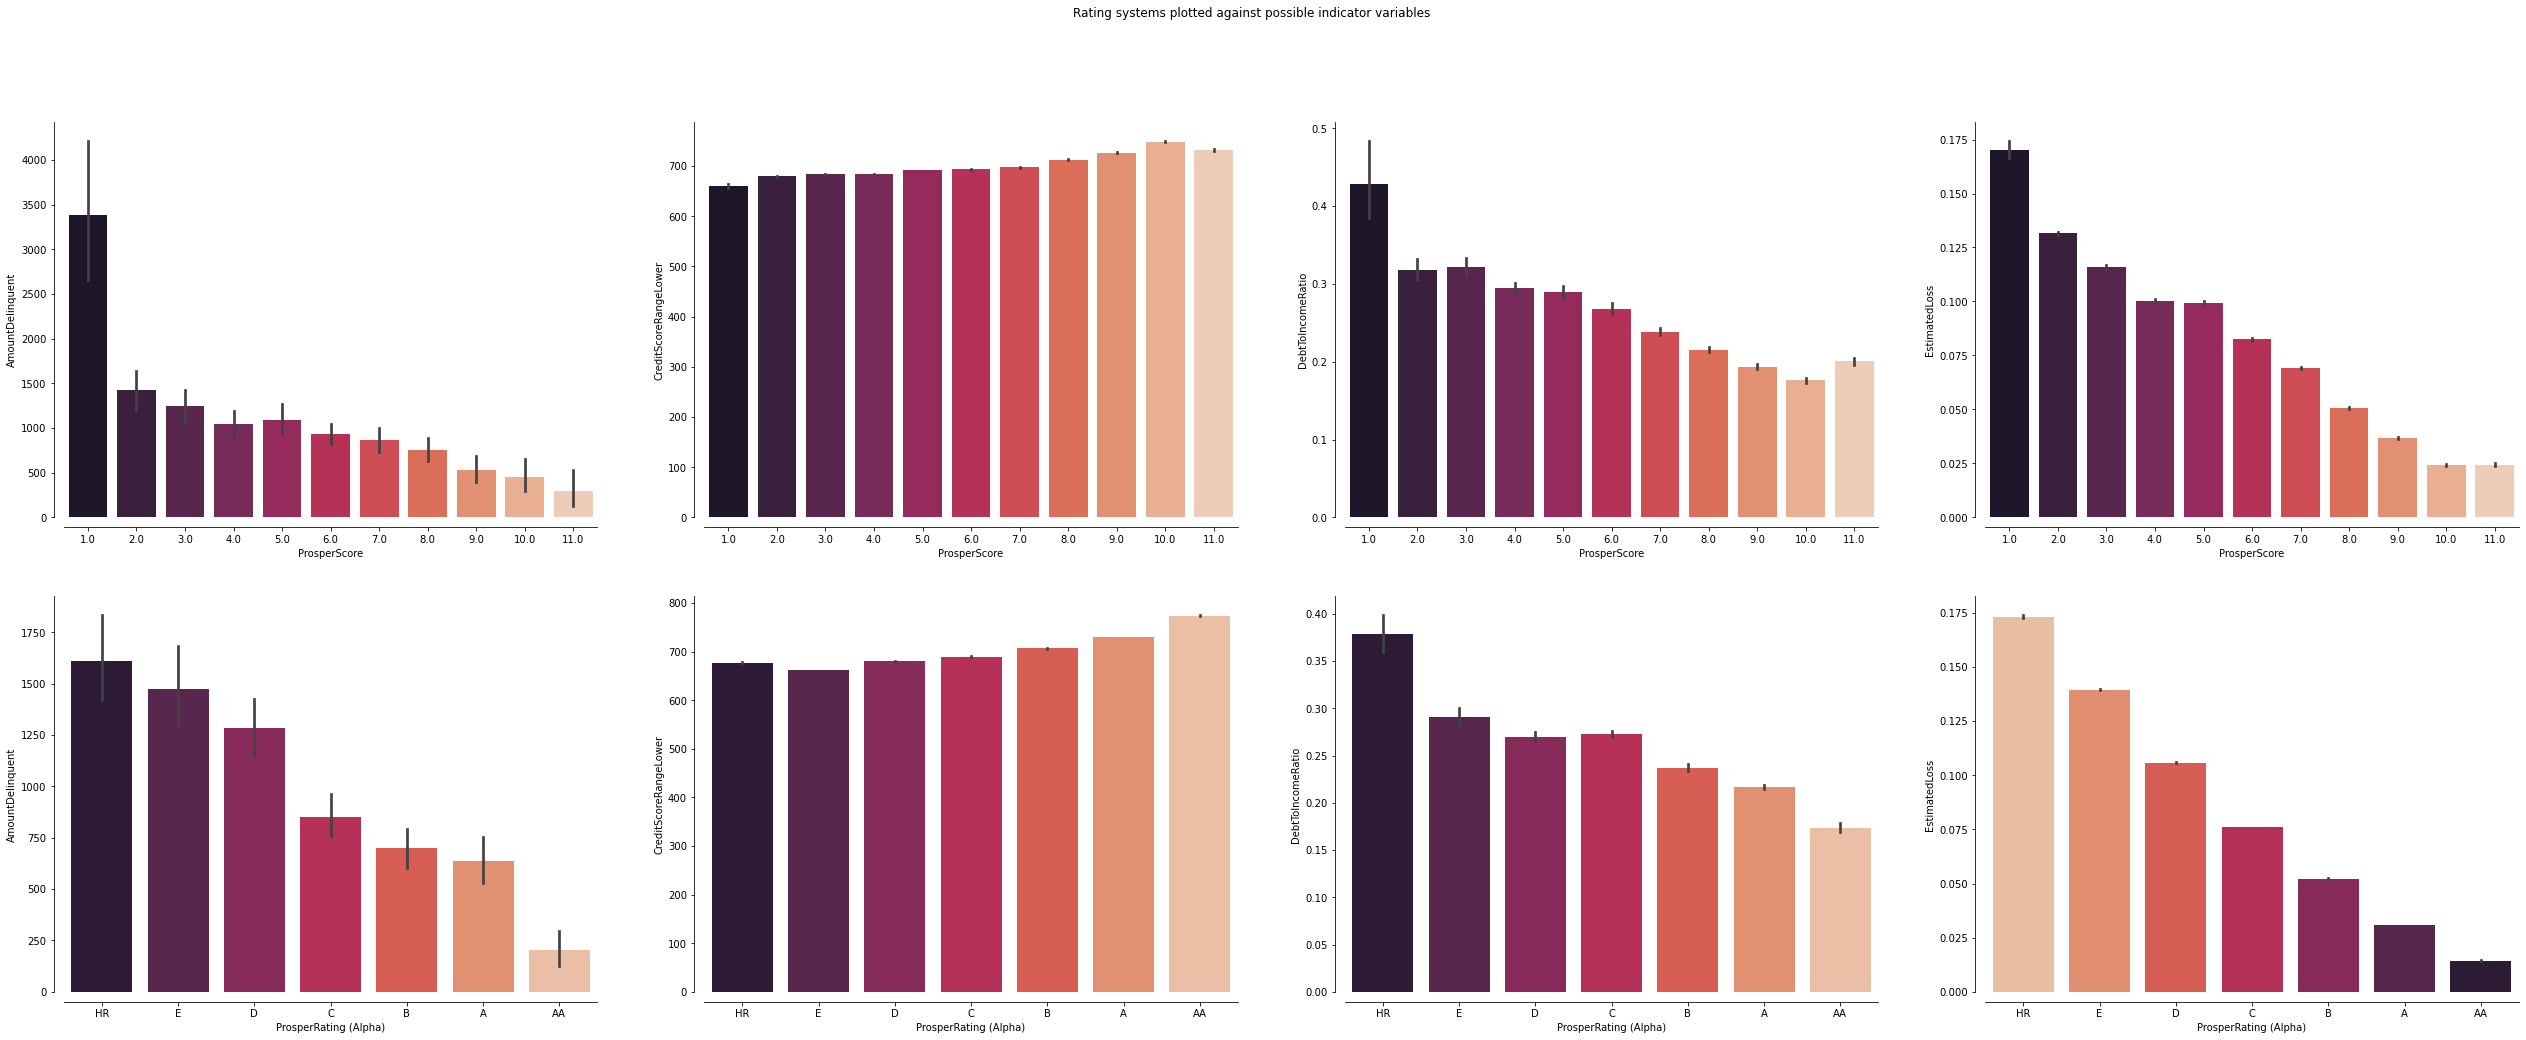

In [37]:
#Reverse rating order in order to keep it in line with prosperscore order
order = reversed(Rating_list)
fig, axs = plt.subplots(2,4, figsize = (44,16))
fig.suptitle('Rating systems plotted against possible indicator variables')
sb.barplot(ax = axs[0,0], x = df_loan_filtered['ProsperScore'],y = df_loan_filtered['AmountDelinquent'],palette=sb.color_palette('rocket',n_colors = 11) )
sb.despine(offset=10, trim=False)
sb.barplot(ax = axs[1,0], x = df_loan_filtered['ProsperRating (Alpha)'], y = df_loan_filtered['AmountDelinquent'], order = order,palette=sb.color_palette('rocket',n_colors = 7))
sb.despine(offset=10, trim=False)
sb.barplot(ax = axs[0,1], x = df_loan_filtered['ProsperScore'],y = df_loan_filtered['CreditScoreRangeLower'],palette=sb.color_palette('rocket',n_colors = 11))
sb.despine(offset=10, trim=False)
sb.barplot(ax = axs[1,1], x = df_loan_filtered['ProsperRating (Alpha)'], y = df_loan_filtered['CreditScoreRangeLower'], order = reversed(Rating_list),palette=sb.color_palette('rocket',n_colors = 7))
sb.despine(offset=10, trim=False)
sb.barplot(ax = axs[0,2], x = df_loan_filtered['ProsperScore'],y = df_loan_filtered['DebtToIncomeRatio'],palette=sb.color_palette('rocket',n_colors = 11))
sb.despine(offset=10, trim=False)
sb.barplot(ax = axs[1,2], x = df_loan_filtered['ProsperRating (Alpha)'], y = df_loan_filtered['DebtToIncomeRatio'], order = reversed(Rating_list),palette=sb.color_palette('rocket',n_colors = 7))
sb.despine(offset=10, trim=False)
sb.barplot(ax = axs[0,3], x = df_loan_filtered['ProsperScore'],y = df_loan_filtered['EstimatedLoss'],palette=sb.color_palette('rocket',n_colors = 11))
sb.despine(offset=10, trim=False)
sb.barplot(ax = axs[1,3], x = df_loan_filtered['ProsperRating (Alpha)'], y = df_loan_filtered['EstimatedLoss'], order = reversed(Rating_list),palette=sb.color_palette('rocket_r',n_colors = 7))
sb.despine(offset=10, trim=False)

## Show skewdness in amounts delinquent. 
The skewedness of the number of listings that have an amount delinquent and how much is shown in these plots. These suggest that a categorical indicator would be more usefull.

([<matplotlib.patches.Wedge at 0x253d94dae50>,
 [Text(-1.0097951175458897, 0.4362497227282591, 'None'),
  Text(0.9836910567030078, -0.4922924993969744, 'Large'),
  Text(1.0982626346950033, -0.06179955689800723, 'Small')])

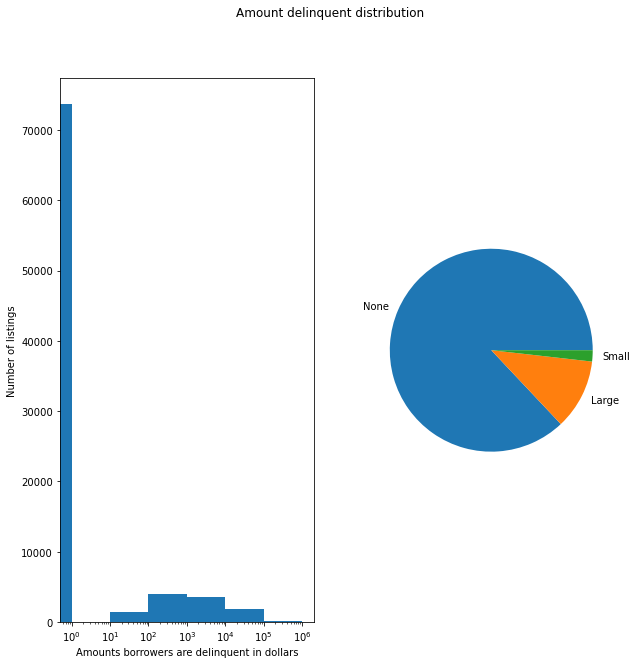

In [33]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (10,10))
fig.suptitle('Amount delinquent distribution')
ax1.hist(df_loan_filtered['AmountDelinquent'], bins=[0,1,5,10,100,1000,10000,100000,1000000])
ax1.set_xlabel('Amounts borrowers are delinquent in dollars')
ax1.set_ylabel('Number of listings')
ax1.set_xscale('log')
ax2.pie(x = df_loan_filtered['HasDelinquency'].value_counts(), labels=df_loan_filtered['HasDelinquency'].unique())

### Listing ratings and Delinquency
When transforming amounts delinquent into a categorical variable, what does this say about the listing ratings?

We see Lender Yields still improve per listing rating however we see yields increase with delinquencies. This effect is more pronounced in the Prosperscores as apposed to the prosper rating. The delinquencies play a larger role in the calculation of prosperscores apparently.

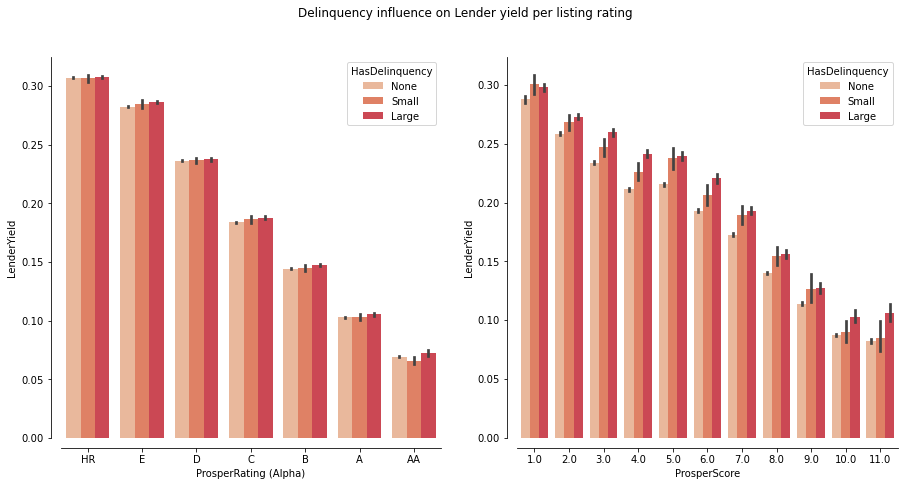

In [30]:
fig = plt.figure(figsize = (15,7))
fig.suptitle("Delinquency influence on Lender yield per listing rating")
gs = fig.add_gridspec(1, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
sb.barplot(ax=ax1, data = df_loan_filtered, x = 'ProsperRating (Alpha)', y = 'LenderYield', order = reversed(RatingList), hue = 'HasDelinquency', hue_order = ['None','Small','Large'],palette=sb.color_palette('rocket_r')),
sb.despine(offset=10, trim=False)
sb.barplot(ax = ax2, data = df_loan_filtered, x = 'ProsperScore', y = 'LenderYield', hue = 'HasDelinquency', hue_order = ['None','Small','Large'],palette=sb.color_palette('rocket_r'))
sb.despine(offset=10, trim=False)
plt.show()

## Listing ratings and estimated losses

Here we can see a larger spread of estimated losses on the individual prosperscores than on the ratings. This suggests the Prosperscores are less influenced by the estimated losses.

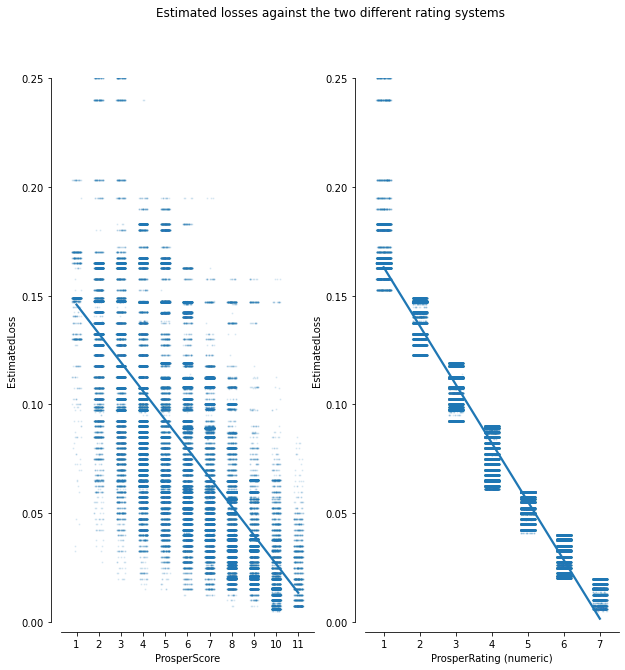

In [28]:
fig, axs= plt.subplots(1,2, figsize=(10,10))
fig.suptitle('Estimated losses against the two different rating systems')
a = sb.regplot(ax=axs[0],y = df_loan_filtered['EstimatedLoss'], x = df_loan_filtered['ProsperScore'], x_jitter=0.2, fit_reg=True, scatter_kws={'alpha':0.1, 's':1.1})
sb.despine(offset=10, trim=False)
a.set(ylim=(0,0.25))
a.set(xticks= np.arange(1,len(df_loan_filtered['ProsperScore'].unique())+1,1))
#using numeric values to allow for fit_reg
sb.regplot(ax=axs[1],y = df_loan_filtered['EstimatedLoss'], x = df_loan_filtered['ProsperRating (numeric)'], x_jitter=0.2, fit_reg=True, scatter_kws={'alpha':0.1,'s':1.1})
sb.despine(offset=10, trim=False)
plt.ylim(0,0.25)
plt.show()


## Listing ratings and debt to income ratio
The debt to income ratio of borowwers may also play a role. However we can see the quartiles along the ratings mostly overlapping. It looks thus, like the Debt to Income ratio has little effect on the ratings.

(0.0, 2.0)

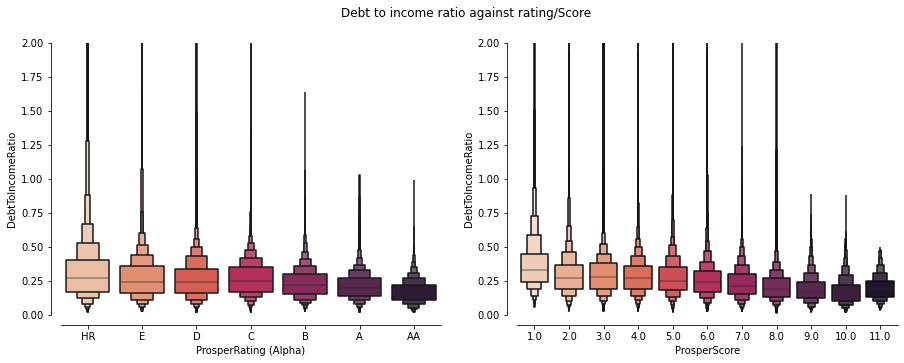

In [25]:
fig, axs = plt.subplots(ncols=2, figsize = (15,5))
fig.suptitle('Debt to income ratio against rating/Score')
sb.boxenplot(ax = axs[0],data = df_loan_filtered, x = 'ProsperRating (Alpha)', y = 'DebtToIncomeRatio', order = reversed(RatingList), palette=sb.color_palette('rocket_r', n_colors= 7),showfliers=False)
sb.despine(offset=10, trim=False)
#limit y axis to improve viewing with large nr of outliers
axs[0].set_ylim(0,2)
sb.boxenplot(ax = axs[1],data = df_loan_filtered, x = 'ProsperScore', y = 'DebtToIncomeRatio', palette=sb.color_palette('rocket_r', n_colors= 11),showfliers = False)
sb.despine(offset=10, trim=False)
axs[1].set_ylim(0,2)

Plotting Lender yield to debt to income ratio's and limiting the debt to income ratio to 0.8, we can see that while debt to income ratio effects the Lender Yield to some extend, in terms of  rating this effect is visible but very limited. Confirming the conclusions from above

(0.0, 0.8)

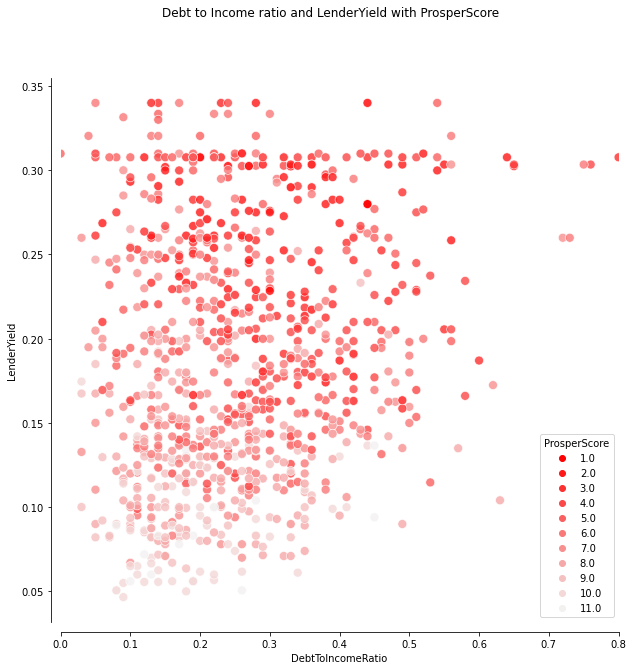

In [23]:
fig, ax = plt.subplots(figsize= (10,10))
fig.suptitle('Debt to Income ratio and LenderYield with ProsperScore')
sb.scatterplot(data = df_loan_filtered.sample(n=1000, replace = True), x = 'DebtToIncomeRatio', y = 'LenderYield', alpha = 0.8, hue = "ProsperScore",palette=sb.light_palette('red', n_colors= 11, reverse=True),s=80)
sb.despine(offset=10, trim=False)
plt.xlim(0,0.8)

## Conclusion

The ratings systems in place seem to be a good indicator of the risk involved. When checking the ratings systems against obvious indicators they show expected behaviour. We see that the `ProsperScore` is more influenced by the delinquency factor, where as the `ProsperRating (Alpha)` has a closer spread in terms of estimated losses. How does this translate into actual risk. Looking at the sum of `EstimatedYield` and `EstimatedLoss` (with loss counted as a negative) we can see the impact of the rating systems. Where te alpha system shows consistent declining yields as the rating improves. The Prosper score is less decicive. Especially with problematic loan results.

### The Alpha rating is best to follow, but stay away from the rating "HR"

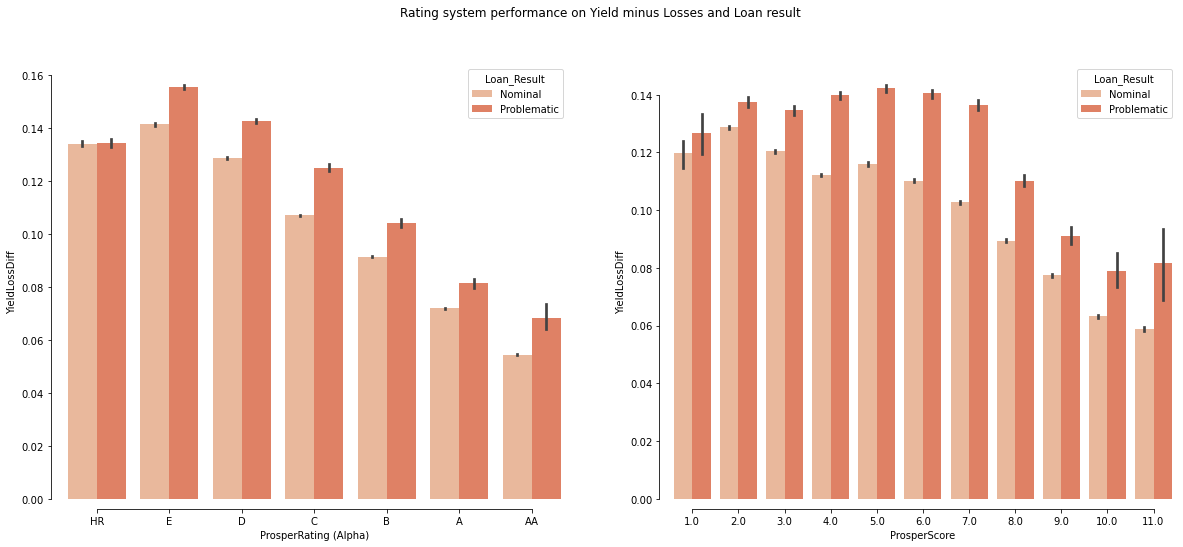

In [21]:
fig = plt.figure(figsize=(20,8))
fig.suptitle('Rating system performance on Yield minus Losses and Loan result')
df_test2 = df_loan_filtered.copy()
df_test2["YieldLossDiff"]= (df_test2['LenderYield']-df_test2['EstimatedLoss'])
ax1 = fig.add_subplot(121)
g = sb.barplot(data= df_test2, y='YieldLossDiff', x = 'ProsperRating (Alpha)', order=reversed(Rating_list), ax = ax1,palette=sb.color_palette('rocket_r'), hue = 'Loan_Result')
g = sb.despine(offset=10, trim=True)
ax2 = fig.add_subplot(122)
g = sb.barplot(data= df_test2, y='YieldLossDiff', x = 'ProsperScore', ax = ax2,palette=sb.color_palette('rocket_r'), hue = 'Loan_Result')
g = sb.despine(offset=10, trim=True)